<a href="https://colab.research.google.com/github/mouss3abbb/boston-housing-prices/blob/main/housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV',axis=1)

In [ ]:
# statistics about the dataset
min_price = np.amin(prices)
max_price = np.amax(prices)
med_price = np.median(prices)
mean_price = np.mean(prices)
stdv = np.std(prices)
print(f'Highest price is {max_price}\nLowest price is {min_price}\nThe average price ranges from {med_price} to {mean_price}\nThe prices varies by about {stdv}')

Highest price is 1024800.0
Lowest price is 105000.0
The average price ranges from 438900.0 to 454342.9447852761
The prices varies by about 165171.13154429474


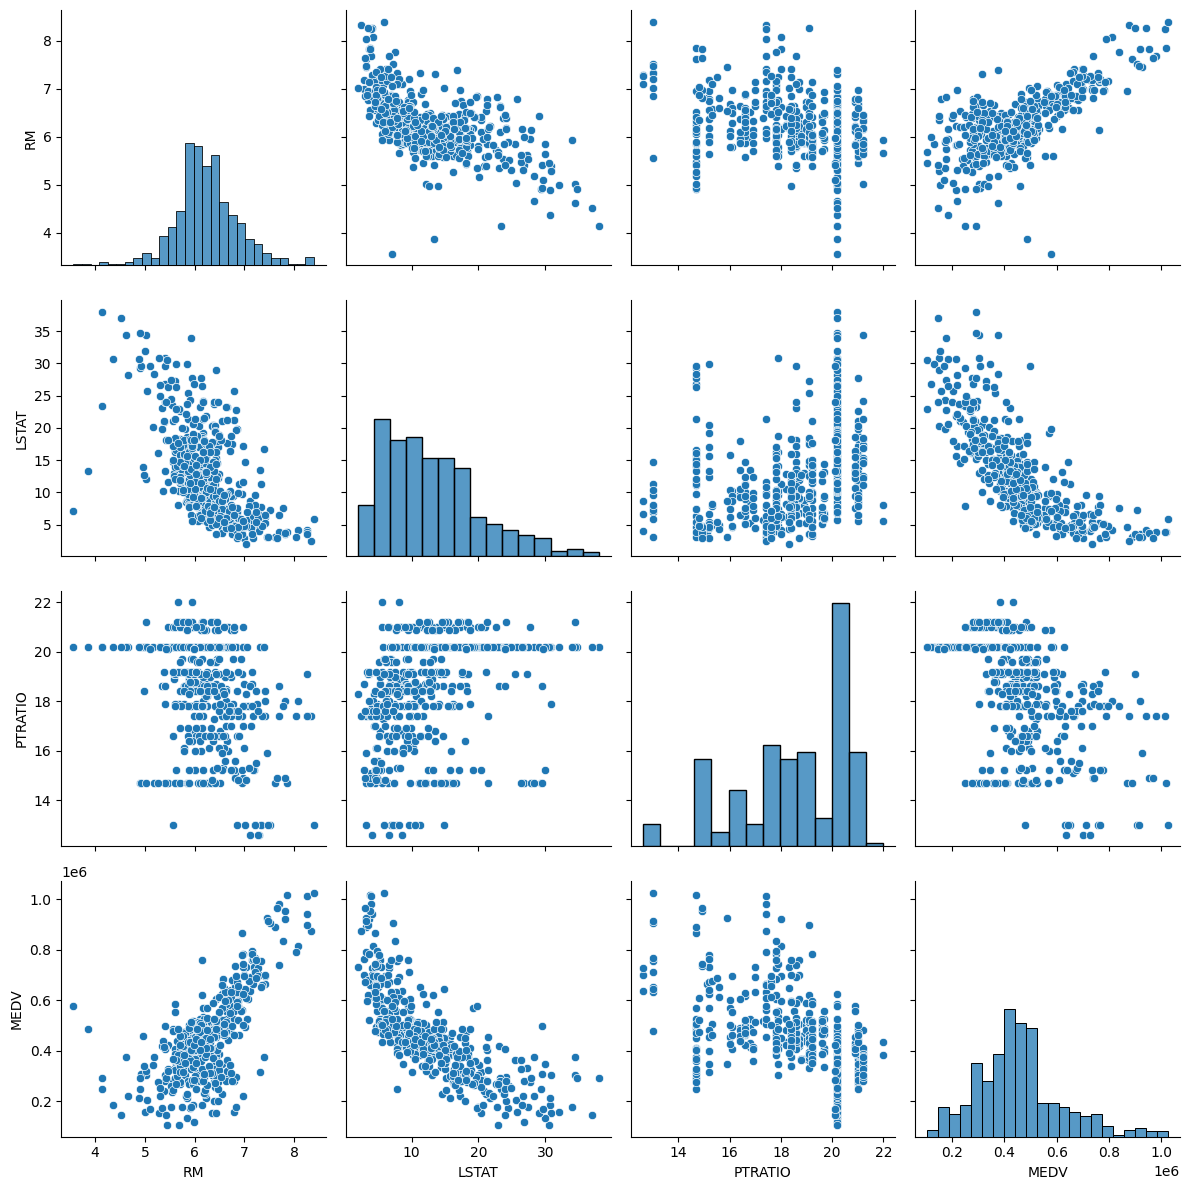

In [ ]:
# plotting data
sns.pairplot(data, height=3)
plt.tight_layout()

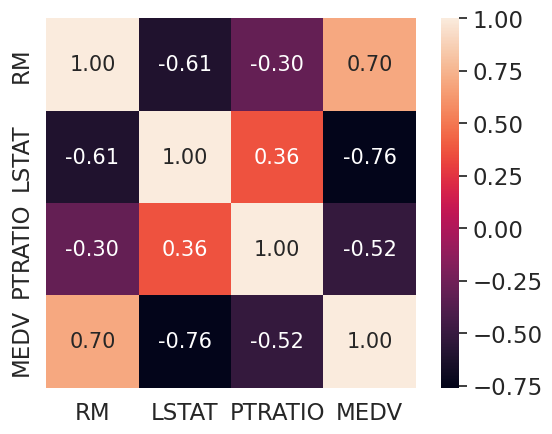

In [ ]:
# Correlation Matrix
labels = ['RM','LSTAT','PTRATIO','MEDV']
sns.set(font_scale=1.5)
heat_map = sns.heatmap(np.corrcoef(data.values.T),
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=labels,
                xticklabels=labels)

In [ ]:
def accuracy(y_true,y_predict):
  return r2_score(y_true,y_predict)

In [ ]:
# Model training
x_train,x_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=40)

In [ ]:
# Fitting model
def fit_model(x,y):

    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    regressor = DecisionTreeRegressor()
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    scoring_fnc = make_scorer(accuracy)
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    grid = grid.fit(x, y)

    return grid.best_estimator_

In [ ]:
# Optimal depth
model = fit_model(x_train, y_train)
print(f"Parameter 'max_depth' is {model.get_params()['max_depth']} for the optimal model.")

Parameter 'max_depth' is 4 for the optimal model.


In [ ]:
# Predicting (rooms, poverty level,student-teacher ratio)
client_data = [[5, 17, 15], 
               [4, 32, 22], 
               [8, 3, 12]]
for i, price in enumerate(model.predict(client_data)):
    print(f"Predicted selling price for Client {i+1}'s home: ${price:,.2f}")


Predicted selling price for Client 1's home: $411,096.00
Predicted selling price for Client 2's home: $219,961.54
Predicted selling price for Client 3's home: $955,500.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
